In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable

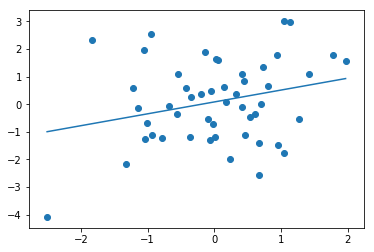

In [11]:
np.random.seed(23)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n) + np.random.normal(size=n)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.scatter(x,y)
plt.show()

In [46]:
#pytorch implementation
x_values = [i for i in range(11)]
x_values
x_train = np.array(x_values, dtype=np.float32).reshape(-1,1)
x_train.shape
y_values = [2 * i + 1 for i in x_values]
y_values
y_train = np.array(y_values, dtype=np.float32).reshape(-1,1)
y_train.shape

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

(11, 1)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

(11, 1)

In [50]:
# create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, out_size):
        super(LinearRegressionModel, self).__init__() # 
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# get model
input_dim=1
output_dim=1
lrmodel = LinearRegressionModel(input_dim, output_dim)

# get loss, optimization
criterion = nn.MSELoss() #mean squared error
learning_rate = 0.01
optimizer = torch.optim.SGD(lrmodel.parameters(), lr=learning_rate)

In [53]:
for epoch in range(1,100):
    # convert numpy array to Variable
    inputs= Variable(torch.from_numpy(x_train))
    labels= Variable(torch.from_numpy(y_train))
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outpus = lrmodel(inputs)
    
    # calculate loss
    loss = criterion(outpus, labels)
    
    # Getting gradient w.r.t parameters
    loss.backward()
    
    #updating parameters
    optimizer.step()
    print(f"epch {epoch} loss {loss.data}")

epch 1 loss 221.00831604003906
epch 2 loss 18.036264419555664
epch 3 loss 1.4803712368011475
epch 4 loss 0.12985780835151672
epch 5 loss 0.019598836079239845
epch 6 loss 0.010504838079214096
epch 7 loss 0.009663613513112068
epch 8 loss 0.009496654383838177
epch 9 loss 0.00938580371439457
epch 10 loss 0.009280593134462833
epch 11 loss 0.009176901541650295
epch 12 loss 0.009074466302990913
epch 13 loss 0.008973116986453533
epch 14 loss 0.008872917853295803
epch 15 loss 0.008773822337388992
epch 16 loss 0.008675907738506794
epch 17 loss 0.008578985929489136
epch 18 loss 0.00848318263888359
epch 19 loss 0.008388416841626167
epch 20 loss 0.008294761180877686
epch 21 loss 0.00820219051092863
epch 22 loss 0.008110574446618557
epch 23 loss 0.008019977249205112
epch 24 loss 0.007930418476462364
epch 25 loss 0.00784186739474535
epch 26 loss 0.007754313759505749
epch 27 loss 0.007667724043130875
epch 28 loss 0.007582075893878937
epch 29 loss 0.007497414480894804
epch 30 loss 0.007413714192807674


In [55]:
# purely inference
predicted = lrmodel(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 1.108723],
       [ 3.093066],
       [ 5.077409],
       [ 7.061752],
       [ 9.046095],
       [11.030437],
       [13.01478 ],
       [14.999124],
       [16.983467],
       [18.96781 ],
       [20.952152]], dtype=float32)

In [65]:
save_model = False
if save_model:
    torch.save(lrmodel.state_dict(), "lr_model.pkl")
load_model = False
if load_model:
    lrmodel.load_state_dict(torch.load("lr_model.pkl"))